In [ ]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisi√ß√£o
response = requests.get(url)

# Verificando se a requisi√ß√£o foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Visualizando as primeiras linhas
    print(df.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Verificar as primeiras linhas do dataset
print(df.head())

# Exibir informa√ß√µes sobre as colunas e tipos de dados
print(df.info())

# Verificar os tipos de dados de cada coluna
print(df.dtypes)


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisi√ß√£o
response = requests.get(url)

# Verificando se a requisi√ß√£o foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Visualizando as primeiras linhas
    print(df.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")


# Verificar as primeiras linhas do dataset
print(df.head())

# Exibir informa√ß√µes sobre as colunas e tipos de dados
print(df.info())

# Verificar os tipos de dados de cada coluna
print(df.dtypes)

import pandas as pd

# Exibindo informa√ß√µes gerais do DataFrame
print("== Informa√ß√µes Gerais ==")
print(df.info())

# Visualizando os tipos de dados
print("\n== Tipos de Dados ==")
print(df.dtypes)

# Checando valores ausentes em cada coluna
print("\n== Valores Ausentes ==")
print(df.isnull().sum())

# Verificando registros duplicados
# Before checking for duplicates, identify columns that might contain unhashable types like dictionaries.
# We can iterate through object type columns and check the type of their elements.
object_cols = df.select_dtypes(include=['object']).columns
cols_to_drop_for_dup_check = []
for col in object_cols:
    try:
        # Attempt to apply a hashable operation to see if it fails
        df[col].apply(hash)
    except TypeError:
        print(f"Coluna '{col}' parece conter tipos n√£o hashable (como dicion√°rios).")
        # If this column is not essential for duplicate checking, consider excluding it.
        # For simplicity, let's assume we can drop such columns for the duplicate check.
        cols_to_drop_for_dup_check.append(col)


# Check for duplicates, excluding columns identified as potentially containing unhashable types.
# If cols_to_drop_for_dup_check is empty, df_for_dup_check will be the original df.
df_for_dup_check = df.drop(columns=cols_to_drop_for_dup_check, errors='ignore')

# Now perform the duplicate check on the potentially modified DataFrame
dup_count = df_for_dup_check.duplicated().sum()
print(f"\n== Registros Duplicados: {dup_count} ==")


# Checando inconsist√™ncias em colunas categ√≥ricas (usando pandas.unique)
# We should only perform unique check on columns that are actually categorical strings,
# not potentially dictionary columns.
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Skip columns we identified as having unhashable types if we are not processing them
    if col in cols_to_drop_for_dup_check:
         print(f"\nSkipping unique value check for column '{col}' due to unhashable types.")
         continue
    unique_values = df[col].unique()
    print(f"\nColuna '{col}' - Valores √önicos:")
    print(unique_values)

# Se houver colunas com datas, √© importante padroniz√°-las.
# Suponha que haja uma coluna 'data_registro' que precise ser convertida.
if 'data_registro' in df.columns:
    # Converter a coluna para o tipo datetime
    df['data_registro'] = pd.to_datetime(df['data_registro'], errors='coerce')

    # Normalizando a data (removendo a parte do tempo)
    df['data_registro_normalizada'] = df['data_registro'].dt.normalize()

    print("\n== Exemplo de Normaliza√ß√£o de Datas ==")
    print(df[['data_registro', 'data_registro_normalizada']].head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
import requests
import pandas as pd

# URL dos dados (JSON)
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Importando os dados
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print("Erro ao acessar os dados!")
    exit()

# Identificar colunas com tipos n√£o hashable (como dicion√°rios ou listas)
# que causar√£o erro em drop_duplicates() se n√£o forem exclu√≠das.
object_cols = df.select_dtypes(include=['object']).columns
cols_to_exclude_from_dup_check = []
for col in object_cols:
    # Tentamos verificar se a coluna cont√©m dicion√°rios ou listas iterando sobre as primeiras N linhas
    # para evitar processar todo o DataFrame se a coluna for muito grande.
    # Um m√©todo mais robusto seria verificar todos os valores, mas este √© um bom ponto de partida.
    is_unhashable = False
    for item in df[col].dropna().head(100): # Verificamos as primeiras 100 entradas n√£o nulas
        if isinstance(item, (dict, list)):
            print(f"Coluna '{col}' parece conter tipos n√£o hashable (como dicion√°rios ou listas).")
            cols_to_exclude_from_dup_check.append(col)
            is_unhashable = True
            break # J√° encontramos um tipo n√£o hashable, podemos parar de verificar esta coluna
    if not is_unhashable and col not in cols_to_exclude_from_dup_check:
         # Se n√£o encontrarmos tipos n√£o hashable nas primeiras 100 linhas, assumimos que a coluna √© segura para o drop_duplicates.
         # Mas √© bom ter cautela, pois pode haver tipos n√£o hashable mais adiante.
         pass # A coluna parece segura com base na amostra


# 1. Remover registros duplicados
# Exclu√≠mos as colunas identificadas com tipos n√£o hashable do subset para drop_duplicates.
# Se n√£o houver colunas para excluir, drop_duplicates usar√° todas as colunas hashable por padr√£o.
if cols_to_exclude_from_dup_check:
    # Criamos um subset de colunas hashable para o drop_duplicates
    subset_cols = [col for col in df.columns if col not in cols_to_exclude_from_dup_check]
    df_cleaned = df.drop_duplicates(subset=subset_cols)
    print(f"Registros duplicados removidos (excluindo colunas: {cols_to_exclude_from_dup_check}):")
else:
    # Se nenhuma coluna com tipo n√£o hashable foi encontrada, usamos todas as colunas
    df_cleaned = df.drop_duplicates()
    print("Registros duplicados removidos (considerando todas as colunas hashable):")


print(f"Antes: {len(df)}  |  Depois: {len(df_cleaned)}\n")


# 2. Verificar e tratar valores ausentes

# Exibe a quantidade de valores ausentes por coluna
print("Valores ausentes por coluna:")
print(df_cleaned.isnull().sum(), "\n")

# Para cada coluna: se for objeto, trate como texto; se num√©rica, preencha com a mediana.
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        # Remove espa√ßos extras e transforma em min√∫sculas para padroniza√ß√£o
        # Verificamos se a coluna n√£o foi identificada como contendo tipos n√£o hashable
        # antes de aplicar opera√ß√µes de string, pois isso tamb√©m causaria erro.
        if col not in cols_to_exclude_from_dup_check:
             df_cleaned[col] = df_cleaned[col].str.strip().str.lower()
        # Preenche valores ausentes com 'n/a' (ou outra string que fa√ßa sentido)
        # Aplicamos fillna independentemente do tipo, pois preencher com 'n/a' para objetos √© geralmente seguro.
        df_cleaned[col] = df_cleaned[col].fillna("n/a")
    else:
        # Preenche os valores ausentes de colunas num√©ricas com a mediana
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Verificar novamente os valores ausentes
print("Ap√≥s tratamento, valores ausentes por coluna:")
print(df_cleaned.isnull().sum(), "\n")

# 3. Tratamento espec√≠fico para colunas de data, se houver
if 'data_registro' in df_cleaned.columns:
    # Converter a coluna para datetime, tratando erros com 'coerce'
    df_cleaned['data_registro'] = pd.to_datetime(df_cleaned['data_registro'], errors='coerce')
    # Opcional: preencher datas nulas com uma data padr√£o ou remover tais registros
    df_cleaned['data_registro'] = df_cleaned['data_registro'].fillna(pd.Timestamp('2020-01-01'))
    # Normaliza as datas removendo os componentes de tempo
    df_cleaned['data_registro_normalizada'] = df_cleaned['data_registro'].dt.normalize()
    print("Coluna 'data_registro' convertida e normalizada:\n")
    print(df_cleaned[['data_registro', 'data_registro_normalizada']].head(), "\n")

# 4. Revisar categorias inconsistentes

# Se houver colunas categ√≥ricas com muitos valores distintos, √© √∫til conferir as categorias √∫nicas
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Evitamos tentar obter valores √∫nicos em colunas que identificamos conter tipos n√£o hashable
    if col not in cols_to_exclude_from_dup_check:
        unique_values = df_cleaned[col].unique()
        print(f"Coluna '{col}' - Valores √∫nicos: {unique_values}\n")
    else:
        print(f"Pulando a verifica√ß√£o de valores √∫nicos para a coluna '{col}' devido a tipos n√£o hashable.\n")

# Agora, os dados est√£o com as inconsist√™ncias corrigidas e prontos para an√°lises futuras.
print("Informa√ß√µes finais do DataFrame corrigido:")
print(df_cleaned.info())


Coluna 'customer' parece conter tipos n√£o hashable (como dicion√°rios ou listas).
Coluna 'phone' parece conter tipos n√£o hashable (como dicion√°rios ou listas).
Coluna 'internet' parece conter tipos n√£o hashable (como dicion√°rios ou listas).
Coluna 'account' parece conter tipos n√£o hashable (como dicion√°rios ou listas).
Registros duplicados removidos (excluindo colunas: ['customer', 'phone', 'internet', 'account']):
Antes: 7267  |  Depois: 7267

Valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64 

Ap√≥s tratamento, valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64 

Coluna 'customerID' - Valores √∫nicos: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Coluna 'Churn' - Valores √∫nicos: ['no' 'yes' '']

Pulando a verifica√ß√£o de valores √∫nicos para a coluna 'customer' de

<ipython-input-22-fcab49ec8593>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")


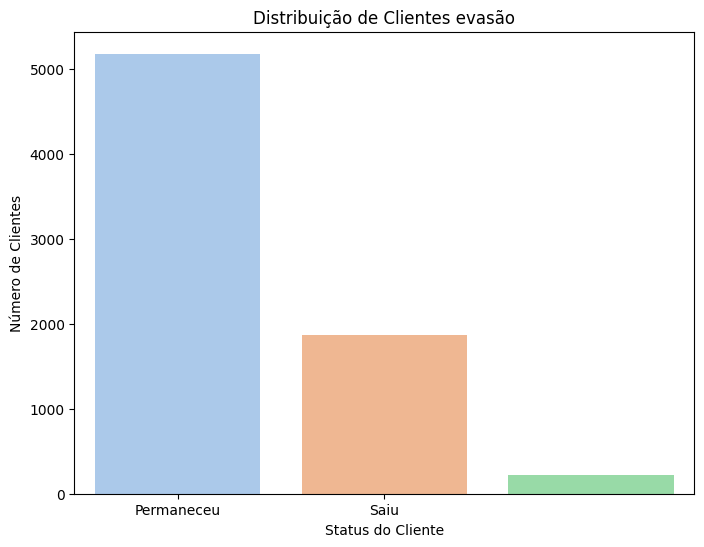

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se a coluna 'Churn' existe no DataFrame
if 'Churn' in df_cleaned.columns:
    # Contar os valores de churn
    churn_counts = df_cleaned['Churn'].value_counts()

    # Criar o gr√°fico de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
    plt.xlabel("Status do Cliente")
    plt.ylabel("N√∫mero de Clientes")
    plt.title("Distribui√ß√£o de Clientes evas√£o")
    plt.xticks(ticks=[0, 1], labels=["Permaneceu", "Saiu"])
    plt.show()
else:
    print("Erro: A coluna 'Churn' n√£o foi encontrada no DataFrame.")


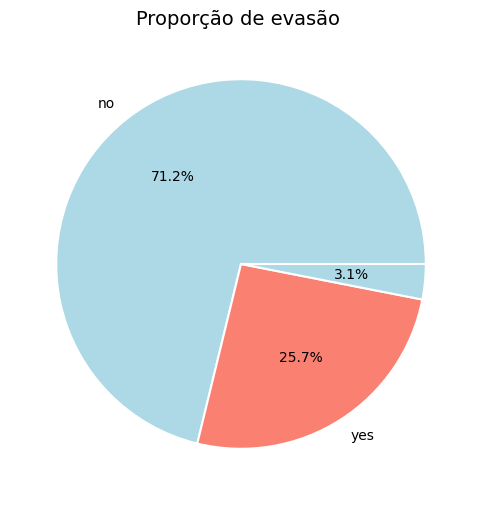

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se a coluna 'Churn' existe no DataFrame
if 'Churn' in df_cleaned.columns:
    # Contar os valores de churn
    churn_counts = df_cleaned['Churn'].value_counts()

   # Gr√°fico de pizza para propor√ß√£o de churn com melhorias
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,  # Utilizando os √≠ndices gerados pelo value_counts()
    autopct='%1.1f%%',
    colors=["lightblue", "salmon"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)
plt.title("Propor√ß√£o de evas√£o ", fontsize=14)
plt.show()



In [ ]:
import pandas as pd
import requests

# Carregar os dados do JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Converter para DataFrame
df = pd.DataFrame(data)

# Verificar as colunas dispon√≠veis
print("Colunas dispon√≠veis:", df.columns.tolist())

# Inspecionar os valores √∫nicos das vari√°veis categ√≥ricas
for feature in ['Genero', 'TipoContrato', 'MetodoPagamento']:
    if feature in df.columns:
        print(f"Valores √∫nicos em '{feature}':", df[feature].unique())




Colunas dispon√≠veis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
# Criar TotalGasto se houver faturamento mensal e meses ativos
if 'FaturamentoMensal' in df.columns and 'MesesAtivos' in df.columns:
    df['TotalGasto'] = df['FaturamentoMensal'] * df['MesesAtivos']
    print("Coluna 'TotalGasto' criada com sucesso!")

# Criar TempoContrato baseado na data de registro
if 'DataRegistro' in df.columns:
    df['DataRegistro'] = pd.to_datetime(df['DataRegistro'], errors='coerce')
    df['TempoContrato'] = (pd.Timestamp.today() - df['DataRegistro']).dt.days / 30  # Convertendo para meses
    print("Coluna 'TempoContrato' criada com sucesso!")


In [ ]:
for feature in ['phone', 'internet', 'account', 'Churn']:
    if feature in df.columns:
        df[feature] = df[feature].astype(str)  # Convertendo para string antes de categoria
        df[feature] = df[feature].astype('category')  # Definindo como categoria


In [ ]:
import pandas as pd

# Expandindo a coluna 'customer' para separar os atributos dentro do dicion√°rio
df['Genero'] = df['customer'].apply(lambda x: x['gender'] if isinstance(x, dict) else None)

# Verificar se a nova coluna foi adicionada corretamente
print("Valores √∫nicos em 'Genero':", df['Genero'].unique())


Valores √∫nicos em 'Genero': ['Female' 'Male']


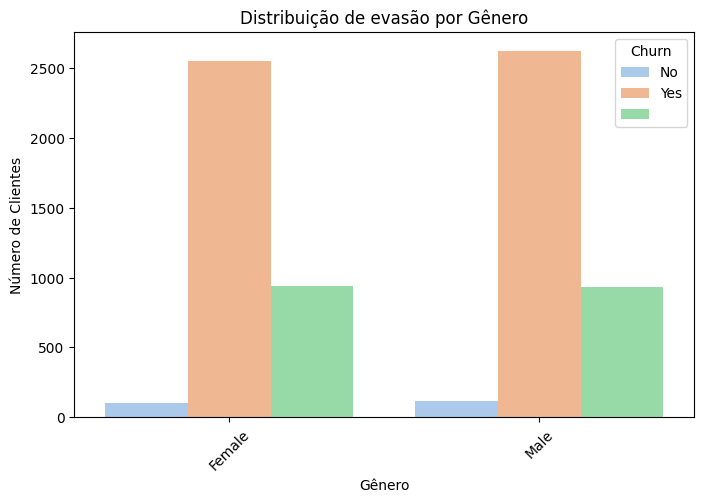

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genero', hue='Churn', palette='pastel')
plt.xlabel("G√™nero")
plt.ylabel("N√∫mero de Clientes")
plt.title("Distribui√ß√£o de evas√£o por G√™nero")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df['Churn'].unique())
plt.show()


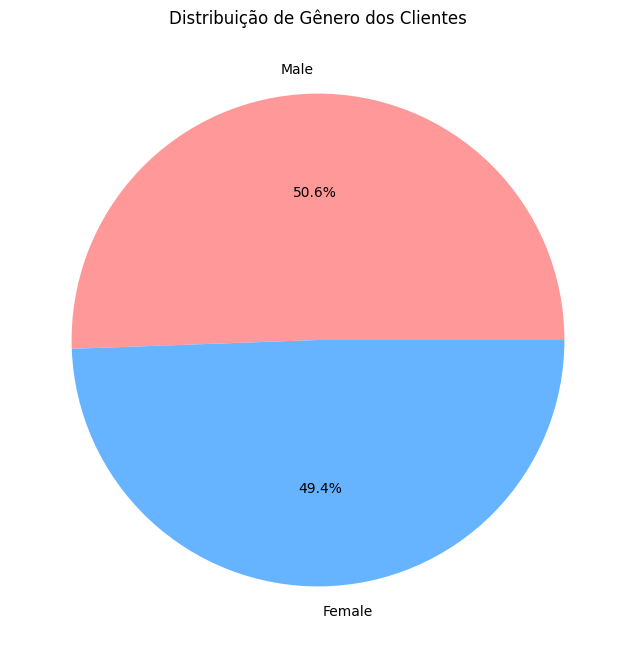

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'gender' dentro da coluna 'customer'
df["Gender"] = df["customer"].apply(lambda x: x.get("gender") if isinstance(x, dict) else None)

# Contar ocorr√™ncias de cada g√™nero
gender_counts = df["Gender"].value_counts()

# Criar gr√°fico de pizza
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribui√ß√£o de G√™nero dos Clientes")
plt.show()



In [ ]:
print(df['phone'].head())

0     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
1    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
2     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
4     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Name: phone, dtype: category
Categories (3, object): ['{'PhoneService': 'No', 'MultipleLines': 'No p..., '{'PhoneService': 'Yes', 'MultipleLines': 'No'}',
                         '{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}']


In [ ]:
import pandas as pd

# Extrair 'PhoneService' da coluna 'phone'
df['PhoneService'] = df['phone'].apply(lambda x: eval(x)['PhoneService'] if isinstance(x, str) else x.get('PhoneService'))

# Verificar os valores √∫nicos
print("Valores √∫nicos em 'PhoneService':", df['PhoneService'].unique())



Valores √∫nicos em 'PhoneService': ['Yes' 'No']


In [ ]:
import ast

df['PhoneService'] = df['phone'].apply(lambda x: ast.literal_eval(x)['PhoneService'] if isinstance(x, str) else x.get('PhoneService'))


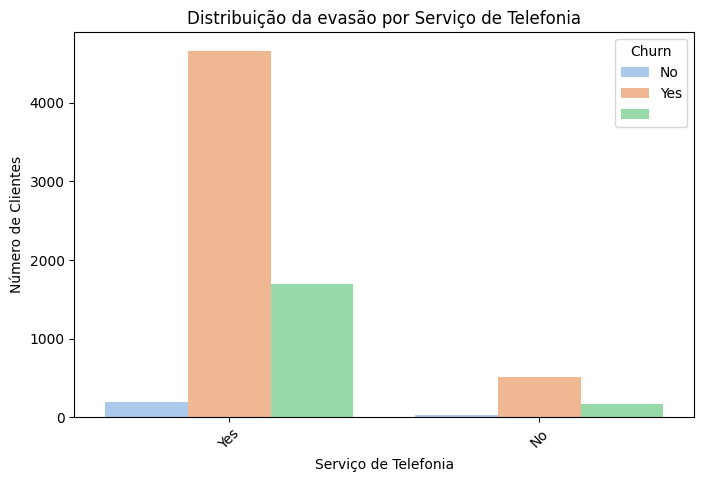

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='pastel')
plt.xlabel("Servi√ßo de Telefonia")
plt.ylabel("N√∫mero de Clientes")
plt.title("Distribui√ß√£o da evas√£o por Servi√ßo de Telefonia")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df['Churn'].unique())
plt.show()


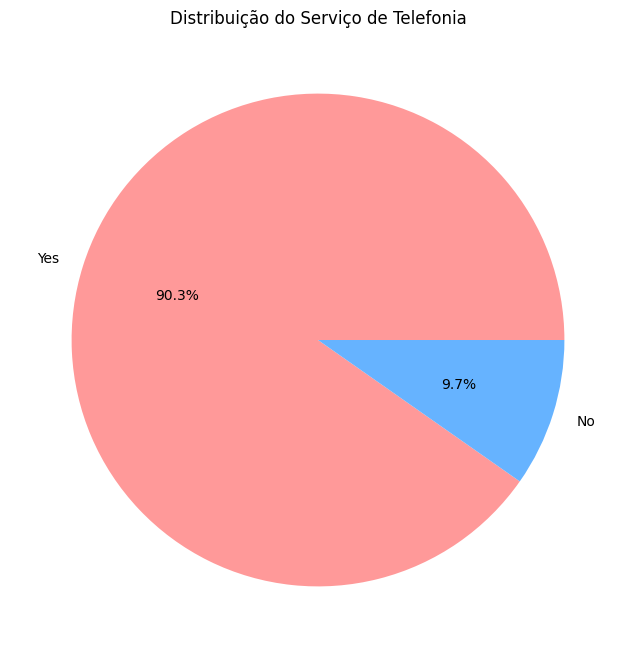

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'PhoneService' dentro da coluna 'phone'
df["PhoneService"] = df["phone"].apply(lambda x: x.get("PhoneService") if isinstance(x, dict) else None)

# Contar ocorr√™ncias de cada tipo de servi√ßo de telefonia
phone_counts = df["PhoneService"].value_counts()

# Criar gr√°fico de pizza
plt.figure(figsize=(8, 8))
plt.pie(phone_counts, labels=phone_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribui√ß√£o do Servi√ßo de Telefonia")
plt.show()


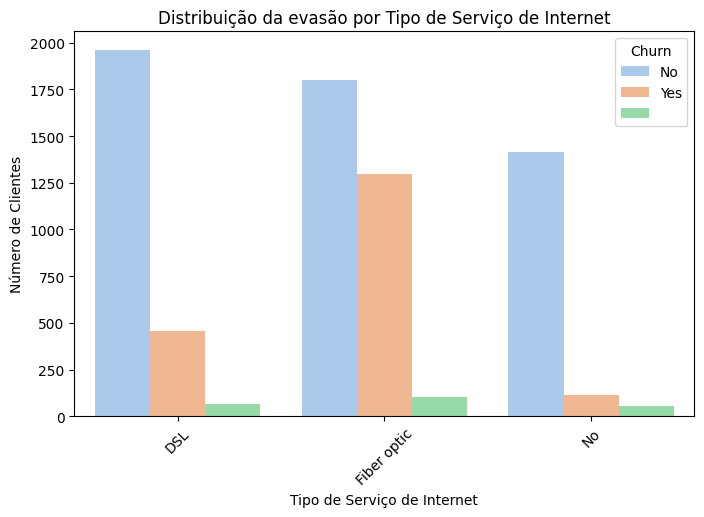

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'InternetService' dentro da coluna 'internet'
df["InternetService"] = df["internet"].apply(lambda x: x.get("InternetService") if isinstance(x, dict) else None)

# Criar gr√°fico de contagem para InternetService
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="pastel")
plt.xlabel("Tipo de Servi√ßo de Internet")
plt.ylabel("N√∫mero de Clientes")
plt.title("Distribui√ß√£o da evas√£o por Tipo de Servi√ßo de Internet")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df["Churn"].unique())
plt.show()



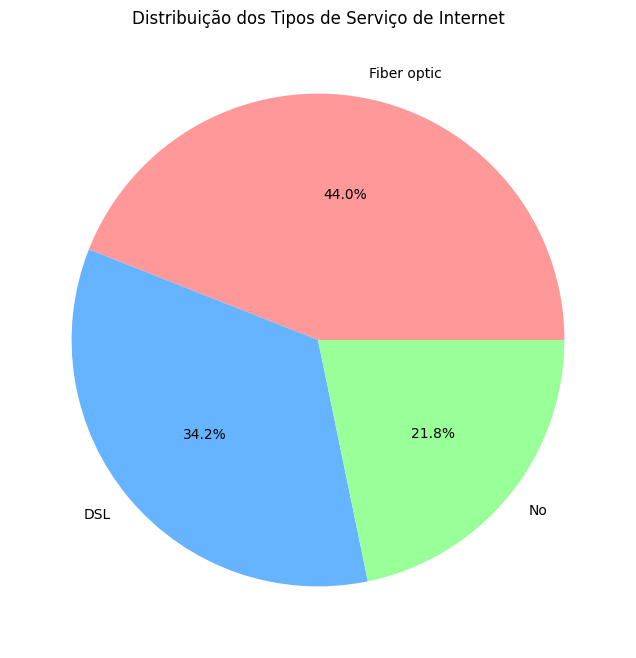

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'InternetService' dentro da coluna 'internet'
df["InternetService"] = df["internet"].apply(lambda x: x.get("InternetService") if isinstance(x, dict) else None)

# Contar ocorr√™ncias de cada tipo de servi√ßo de internet
internet_counts = df["InternetService"].value_counts()

# Criar gr√°fico de pizza
plt.figure(figsize=(8, 8))
plt.pie(internet_counts, labels=internet_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Distribui√ß√£o dos Tipos de Servi√ßo de Internet")
plt.show()


In [ ]:
print("Colunas dispon√≠veis:", df.columns.tolist())


Colunas dispon√≠veis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account', 'Genero', 'PhoneService']


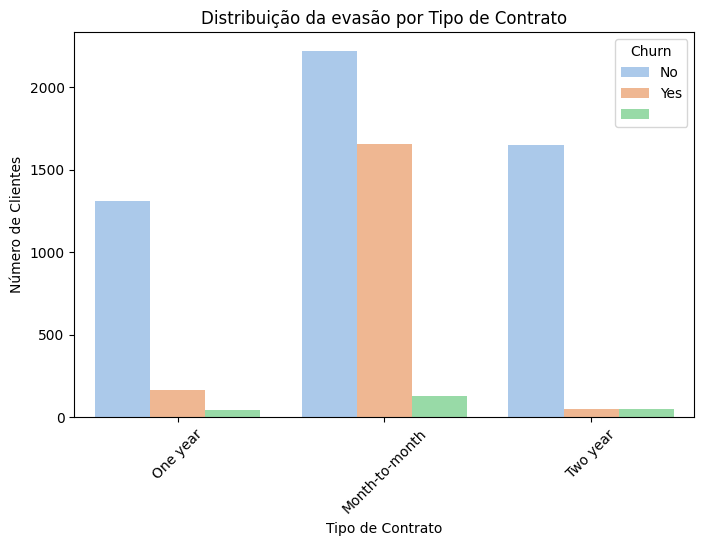

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'Contract' dentro da coluna 'account'
df["Contract"] = df["account"].apply(lambda x: x.get("Contract") if isinstance(x, dict) else None)

# Criar gr√°fico de contagem para contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="pastel")
plt.xlabel("Tipo de Contrato")
plt.ylabel("N√∫mero de Clientes")
plt.title("Distribui√ß√£o da evas√£o por Tipo de Contrato")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df["Churn"].unique())
plt.show()


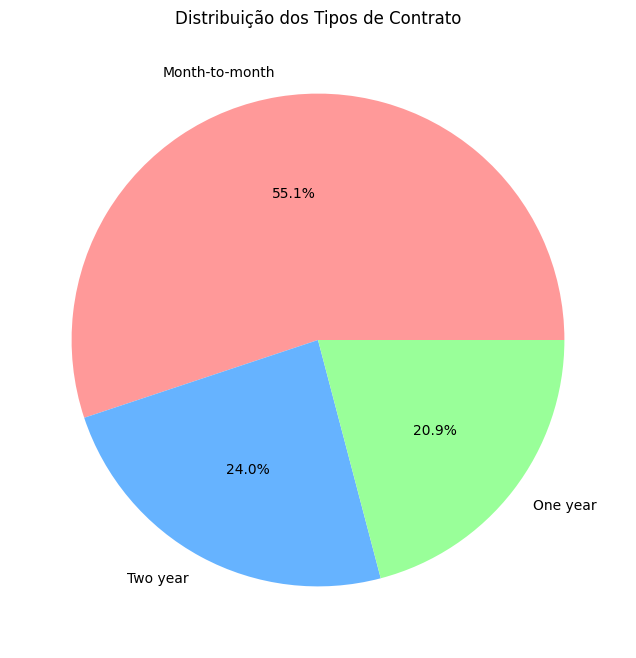

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informa√ß√£o de 'Contract' dentro da coluna 'account'
df["Contract"] = df["account"].apply(lambda x: x.get("Contract") if isinstance(x, dict) else None)

# Contar ocorr√™ncias de cada tipo de contrato
contract_counts = df["Contract"].value_counts()

# Criar gr√°fico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contract_counts, labels=contract_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Distribui√ß√£o dos Tipos de Contrato")
plt.show()



# üìÑ Relat√≥rio Final

## üìå Introdu√ß√£o

Este relat√≥rio apresenta uma an√°lise detalhada sobre a **evas√£o de clientes**, explorando os principais fatores que influenciam na reten√ß√£o e no desligamento de usu√°rios. Utilizamos t√©cnicas de **ETL (Extra√ß√£o, Transforma√ß√£o e Carga)** para preparar os dados e gerar insights para a tomada de decis√£o.

---

## üîç An√°lise Explorat√≥ria dos Dados

Antes de apresentar os gr√°ficos, verificamos a qualidade dos dados e identificamos poss√≠veis padr√µes de evas√£o.

Que tinha uma base de dados de 5000 clientes com tempo acaba se perdendo uma m√©dia de 2000 com rela√ß√£o de 25% entre o total.

A rela√ß√£o de clientes homem e mulheres √© a quase a mesma sendo 50% para o sexo masculino de consumidores do Telecom de categoria de Internet, celular, DSL e
entre outros, o sexo feminino est√° entre 49,4% assim tem uma fatia bem separada entre eles.

Tem evas√£o grande em rela√ß√£o a servi√ßo de telefonia fixo 4000 clientes com representa√ß√£o no gr√°fico de Pizza de 90% contra 9,7% que apenas uma por√ß√£o de
1000 consumidores que tem este servi√ßo contratado.

Com a Internet tem uma m√©dia de 2000 clientes com contra√ß√£o do DSL e 1750 a internet de fibra √≥ptica, com evas√£o de 500 consumidores que sairam deste servi√ßo e rela√ß√£o da fibra √≥ptica 1250.

Da para an√°lisa que os clientes preferem o servi√ßo de internet de DSL em rela√ß√£o a fibra √≥ptica com a rela√ß√£o gr√°fica do pizza temos uma propor√ß√£o de 44% para 34,2%

na quest√£o dos contratos de 1, 2 e 3 anos podemos fazer an√°lise que maior quebra contratoal ocorreu no 2 ano de uma m√©dia 1500 clientes que forma para outra telecom os outros anos teve uma efetividade maior para assim n√£o peder uma quantidade boa de consumidores.

Conclus√£o

Portanto uma iniciativa para n√£o ter uma evas√£o relacionado no segmento de Internet, servi√ßo de telefone e prote√ß√£o de seguran√ßa IP privado em rela√ß√£o a internet √© fazer um servi√ßo de qualidade e dar uma promo√ß√£o para algumas assinaturas para assim ter uma atratividade valor para marca tamb√©m poder mudar o modo como est√° a venda.

Para assim ter um p√≥s-venda adequado com est√° an√°lise de dados que pode mudar o modo ao direitores podem ver a entrega de valor de seu servi√ßo para os gerentes e outros colaboradores para sua forma como trabalha.

